In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving as an ODE

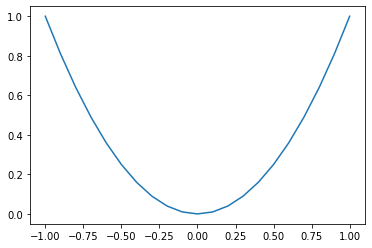

In [2]:
dx = 0.1
L = 1.0
x = np.arange(-L, L+dx, dx)

def harmonic_potential(x):
    return x**2

plt.plot(x, harmonic_potential(x))
plt.show()

\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} + V(x)\psi = E \psi
\end{equation}

\begin{equation}
\frac{d^2 \psi}{dx^2} - \frac{2m}{\hbar^2}(V(x) - E)\psi = 0
\end{equation}

\begin{equation}
\frac{d^2 \psi}{dx^2} + (\epsilon - \cal{V})\psi = 0
\end{equation}

\begin{equation}
\frac{d^2 \psi}{dx^2} = (\cal{V} - \epsilon)\psi 
\end{equation}

\begin{align}
\frac{d \psi}{dx} &= \psi' \\
\frac{d \psi'}{dx} &= (\cal{V} - \epsilon)\psi 
\end{align}


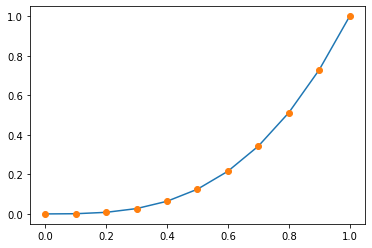

In [3]:
# Testing solve_ivp for a first order ODE

from scipy.integrate import solve_ivp

dt = 0.1
t = np.arange(0, 1+dt, dt)

def f(t, y, a):
    return a*t**2

a = 3.0

sol = solve_ivp(f, t_span=(0,1), y0=[0], t_eval=t, args=[a])
y = sol.y[0]

plt.plot(t, a*(t**3)/3)
plt.plot(t, y, marker='o', ls='')
plt.show()

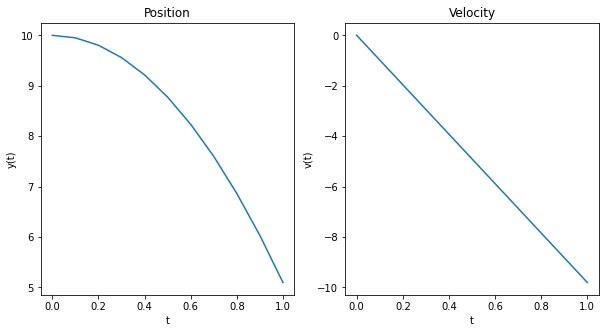

In [4]:
# Testing solve_ivp for a second order ODE

def f(t, yv):
    g = 9.8
    y, v = yv
    dy_dt = v
    dv_dt = -g
    return dy_dt, dv_dt

dt = 0.1
t = np.arange(0, 1+dt, dt)

sol = solve_ivp(f, t_span=(0,1), y0=[10, 0], t_eval=t)
y, v = sol.y  


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Position')

plt.subplot(1,2,2)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Velocity')
plt.show()

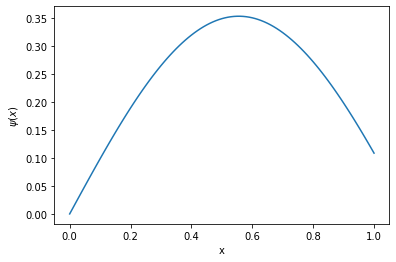

In [5]:
# Solving a infinite well

def f(t, z, E):
    psi, psi_prime = z
    dpsi_dt = psi_prime
    dpsi_prime_dt = -E*psi
    return dpsi_dt, dpsi_prime_dt

L = 1.0
dx = 0.01
x = np.arange(0, L+dx, dx)

E = 8.0 # Guess

def solve_schrodinger(E):
    sol = solve_ivp(f, t_span=(0,1), y0=[0, 1], t_eval=x, args=[E])
    psi, psi_prime = sol.y
    return psi

psi = solve_schrodinger(E)

plt.plot(x, psi)
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.show()

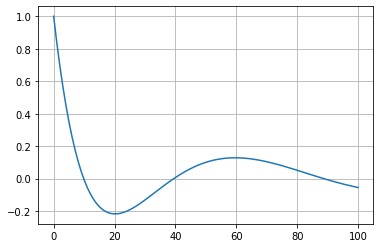

In [6]:
@np.vectorize
def shoot(E):
    psi = solve_schrodinger(E)
    return psi[-1]

E_guess = np.linspace(0, 100, 100)

plt.plot(E_guess, shoot(E_guess))
plt.grid()
plt.show()

In [7]:
# We have zeros around 10, 40 and 90

from scipy.optimize import newton

E = newton(shoot, (10, 40, 90))
print(E)

psi1 = solve_schrodinger(E[0])
psi2 = solve_schrodinger(E[1])
psi3 = solve_schrodinger(E[2])

[ 9.86558621 39.45906306 88.77729338]


In [8]:
# Normalization

def normalize(psi):
    norm = np.linalg.norm(psi)
    return psi/norm

psi1 = normalize(psi1)
psi2 = normalize(psi2)
psi3 = normalize(psi3)

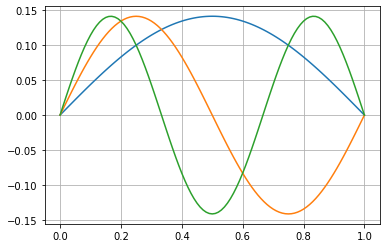

In [9]:
plt.plot(x, psi1)
plt.plot(x, psi2)
plt.plot(x, psi3)
plt.grid()
plt.show()

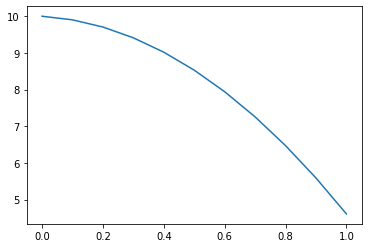

In [22]:
dt = 0.1
t = np.arange(0, 1+dt, dt)
N = len(t)

x = 10.0
v = 0.0

def f():
    g = 9.8
    return -g


x_list = []
v_list = []

for i in range(N):
    x_list.append(x)
    v_list.append(v)
    v = v + f()*dt
    x = x + v*dt
    
plt.plot(t, x_list)
plt.show()

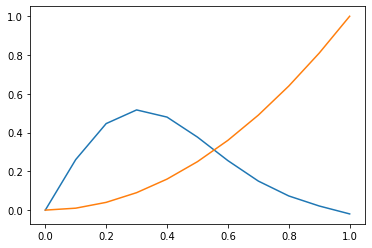

In [79]:
# Doing an harmonic potential

dx = 0.1
x = np.arange(0, 1+dx, dx)
N = len(t)

psi = 0.0
psi_prime = 1.0 # Guess
init = (psi, psi_prime)

def f(psi, E, V):
    return (V-E)*psi

V = 100*(x)**2

def solve_schrodinger(init, E):
    psi, psi_prime = init
    psi_list = []

    for i in range(N):
        psi_list.append(psi)
        psi_prime = psi_prime + f(psi, E, V[i])*dx
        psi = psi + psi_prime*dx
    
    return psi_list

psi_list = solve_schrodinger(init, 29.8)
psi = normalize(psi_list)

plt.plot(x, psi)
plt.plot(x, V/100)